In [3]:
import pandas as pd
import pickle
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../data/processed/cleaned_essays.csv')

In [5]:
# Load saved models and TF-IDF
with open('../model/logistic_regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('../model/tfidf_vectorizer.pkl', 'rb') as f:
    tfidf = pickle.load(f)

with open('../model/label_encoder.pkl', 'rb') as f:
    label_classes = pickle.load(f)

In [6]:
# Prepare data
X = tfidf.transform(df['clean_text'])
y_true = df['prompt_name']

In [7]:
# Predict
y_pred = model.predict(X)
y_pred_labels = [label_classes[label] for label in y_pred]

<Figure size 1000x800 with 0 Axes>

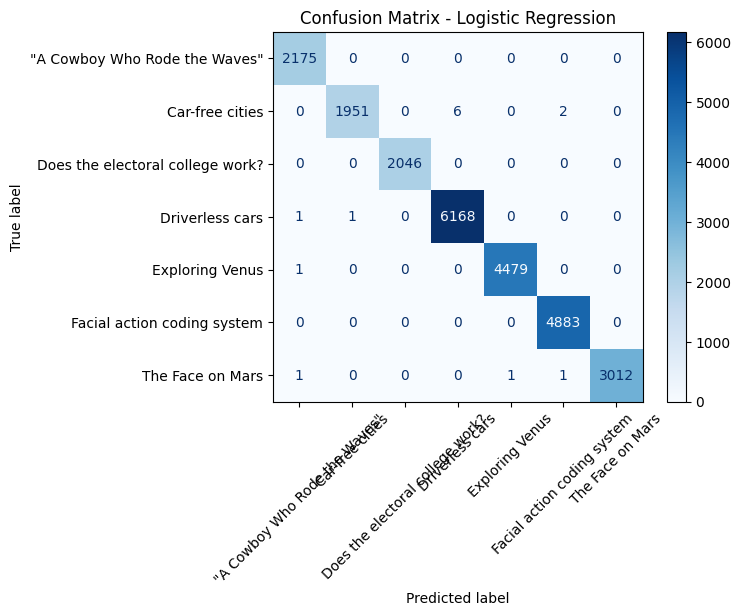

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_labels, labels=label_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_classes)

plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.xticks(rotation=45)
plt.show()

In [9]:
# Classification Report
print("\n📊 Classification Report:\n")
print(classification_report(y_true, y_pred_labels))



📊 Classification Report:

                                  precision    recall  f1-score   support

   "A Cowboy Who Rode the Waves"       1.00      1.00      1.00      2175
                 Car-free cities       1.00      1.00      1.00      1959
Does the electoral college work?       1.00      1.00      1.00      2046
                 Driverless cars       1.00      1.00      1.00      6170
                 Exploring Venus       1.00      1.00      1.00      4480
     Facial action coding system       1.00      1.00      1.00      4883
                The Face on Mars       1.00      1.00      1.00      3015

                        accuracy                           1.00     24728
                       macro avg       1.00      1.00      1.00     24728
                    weighted avg       1.00      1.00      1.00     24728

